In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn-whitegrid')

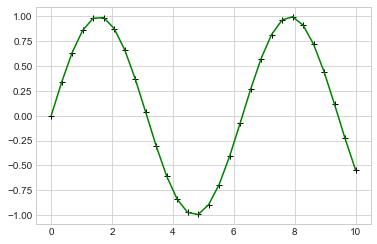

In [2]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

# ax.plot(x, np.sin(x))
plt.plot(x, y, "+", color="black")
plt.plot(x, y, color="green")


In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data.T

pd.DataFrame(
    np.hstack([iris.data, iris.target[:, np.newaxis]]), 
    columns=np.concatenate((iris.feature_names,["class"]))
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


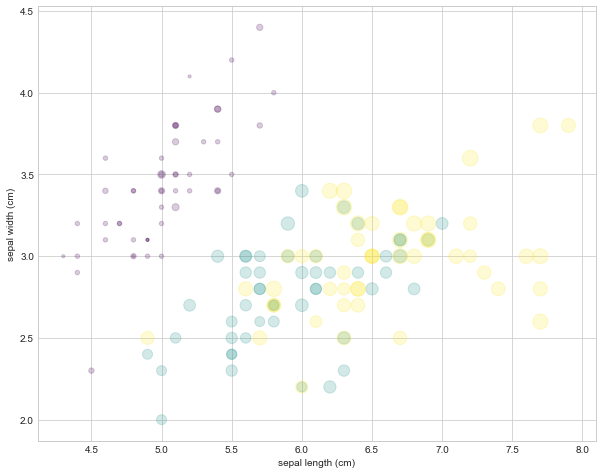

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(features[0], features[1], alpha=0.2, s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([0, 0, 1, 1])
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.5, random_state=0)
for test, train in sss.split(X, y):
    print(test)
    print(train)

[1 2]
[3 0]
[0 2]
[1 3]


In [6]:
test

array([0, 2], dtype=int32)

In [7]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo': "a", 'bar': "b"}, {'foo': "a", 'baz': "c"}]
X = v.fit_transform(D)

In [8]:
X

array([[ 1.,  0.,  1.],
       [ 0.,  1.,  1.]])

In [9]:
a = np.random.randint(1, 20, 10)

In [10]:
a

array([17,  9, 14, 15, 12,  8,  4, 14,  2,  4])

In [11]:
a[(a > 10) | (a < 2)]

array([17, 14, 15, 12, 14])

In [12]:
a > 15

array([ True, False, False, False, False, False, False, False, False, False], dtype=bool)

In [13]:
b = np.array([1, 4, 7, 8])

In [16]:
a = np.random.randint(1, 100, (17))

In [17]:
a

array([26, 47, 27, 88, 99, 18, 82, 28, 42, 83, 15, 58, 61, 32,  3])

In [91]:
a.sort()
a_splitted = np.array_split(a, 3)
a_splitted

[array([ 3, 15, 18, 26, 27]),
 array([28, 32, 42, 47, 58]),
 array([61, 82, 83, 88, 99])]

In [92]:
sub_spaces = []
for a_part in a_splitted:
    if not a_part.all():
        break
    sub_spaces.append((a_part[0], a_part[-1]))

print(sub_spaces)

[(3, 27), (28, 58), (61, 99)]


In [93]:
s = np.linspace(3, 18)

In [94]:
b = np.empty_like(a)

for i, v in np.ndenumerate(a):
    for sub_space_index, sub_space in enumerate(sub_spaces):
        if sub_space[0] <= v <= sub_space[1]:
            b[i] = sub_space_index
            break

In [95]:
print(sub_spaces)
print(a)
print(b)

[(3, 27), (28, 58), (61, 99)]
[ 3 15 18 26 27 28 32 42 47 58 61 82 83 88 99]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
